### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import missingno as msno
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")

### Read the dataset into a DataFrame variable.

In [2]:
netflix_df=pd.read_csv('Data/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### first remove the unwanted description column

In [3]:
netflix_df.drop('description',axis=1,inplace=True)

### Looking at the dataframe informtion 

In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


#### It seems we have some columns with null values

In [5]:
print('The columns with the number of null_value are:\n' +str({k:v for (k,v) in netflix_df.isna().sum().to_dict().items() if v!=0}))

The columns with the number of null_value are:
{'director': 2634, 'cast': 825, 'country': 831, 'date_added': 10, 'rating': 4, 'duration': 3}


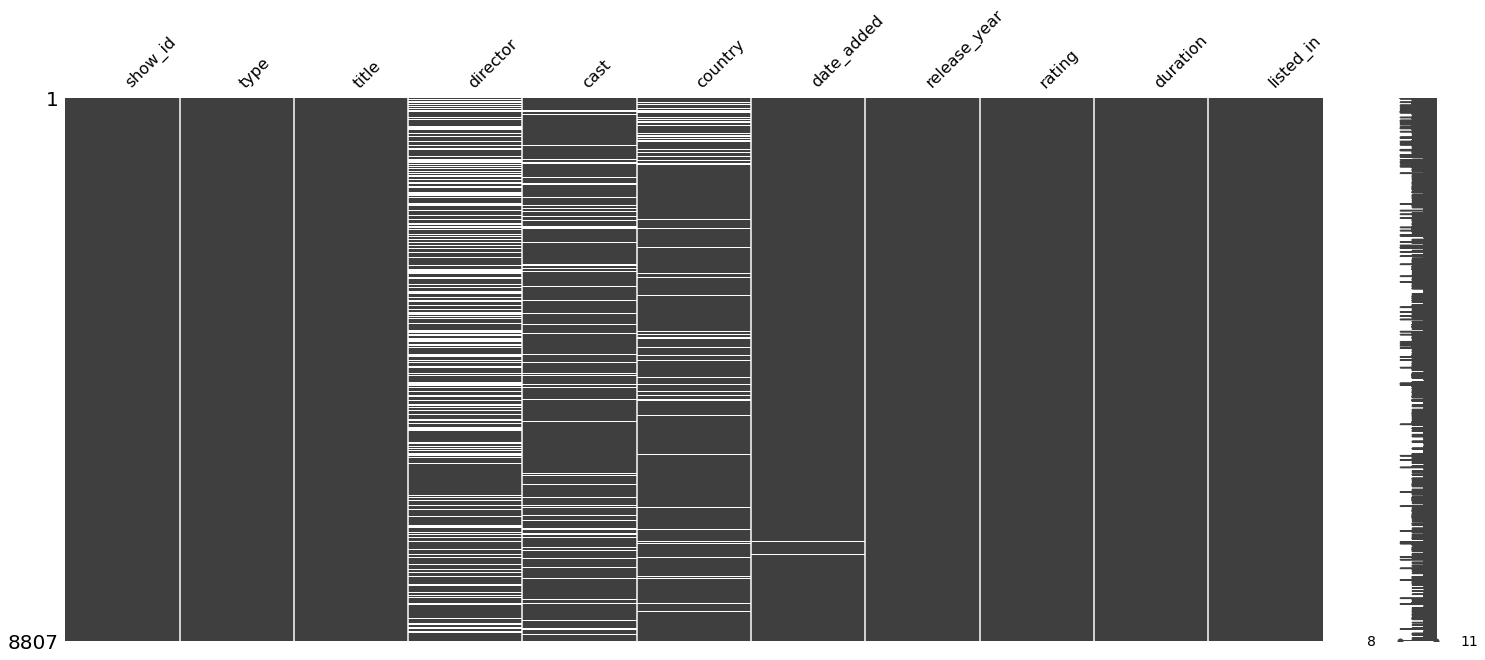

In [6]:
msno.matrix(netflix_df)

### Dealing with missing value by droping

In [7]:
netflix_df.dropna(subset=['rating','duration','date_added'],inplace=True)
netflix_df.dropna(thresh=8,inplace=True)

In [8]:
print('Now The columns with the number of null_value are:\n' +str({k:v for (k,v) in netflix_df.isna().sum().to_dict().items() if v!=0}))

Now The columns with the number of null_value are:
{'director': 2621, 'cast': 825, 'country': 829}


### The show_ids with at least 2 null columns

In [9]:
netflix_df[(netflix_df['director'].isna())&(netflix_df['cast'].isna())]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
10,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S..."
14,s15,TV Show,Crime Stories: India Detectives,NaN,NaN,NaN,22-Sep-21,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
66,s67,TV Show,Raja Rasoi Aur Anya Kahaniyan,NaN,NaN,India,15-Sep-21,2014,TV-G,1 Season,"Docuseries, International TV Shows"
69,s70,TV Show,Stories by Rabindranath Tagore,NaN,NaN,India,15-Sep-21,2015,TV-PG,1 Season,"International TV Shows, TV Dramas"
...,...,...,...,...,...,...,...,...,...,...,...
8605,s8606,TV Show,Top Grier,NaN,NaN,United States,31-Dec-18,2018,TV-MA,3 Seasons,Reality TV
8609,s8610,TV Show,Towies,NaN,NaN,NaN,27-Dec-17,2016,TV-MA,1 Season,"International TV Shows, Reality TV"
8700,s8701,TV Show,Wartime Portraits,NaN,NaN,Poland,15-Sep-16,2014,TV-MA,1 Season,"Docuseries, International TV Shows"
8755,s8756,TV Show,Women Behind Bars,NaN,NaN,United States,"November 1, 2016",2010,TV-14,3 Seasons,"Crime TV Shows, Docuseries"


### Dealing with missing value by imputating

In [10]:
netflix_df.fillna({'director':'Unknown',
                    'cast'  :'Unknown',
                    'country' :'not_mention' }, inplace=True)

Now The columns with the number of null_value are:
{}


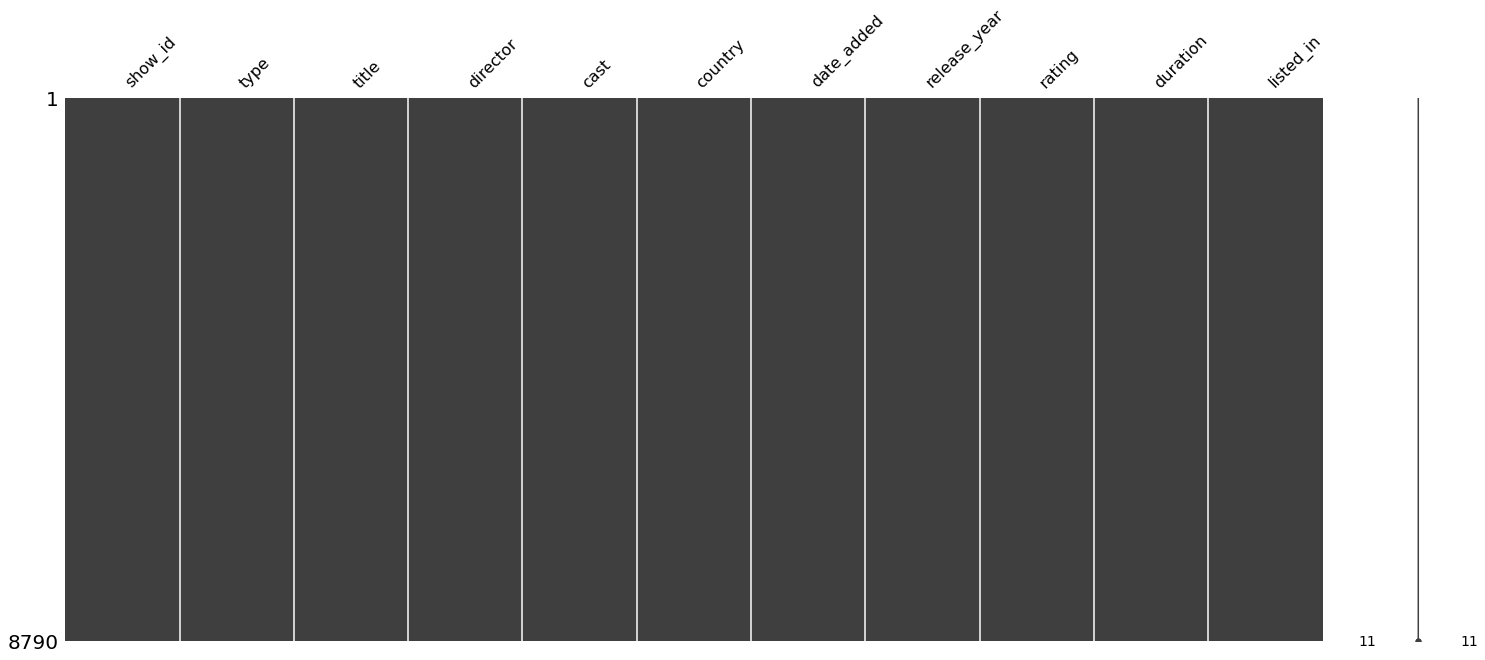

In [11]:
print('Now The columns with the number of null_value are:\n' +str({k:v for (k,v) in netflix_df.isna().sum().to_dict().items() if v!=0}))
msno.matrix(netflix_df)

In [12]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,25-Sep-21,2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",not_mention,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,not_mention,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


### Setting the index of dataframe to Show_id column

#### first make sure there is not any duplicated values in show_id column

In [13]:
netflix_df.duplicated().sum()

0

In [14]:
netflix_df.set_index('show_id',inplace=True)


#### Checking if there is not any duplicated values after setting index


In [15]:
netflix_df.loc[netflix_df.duplicated(keep=False)]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
show_id,,,,,,,,,,
s3963,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,29-Mar-19,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"
s3997,TV Show,9-Feb,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",not_mention,20-Mar-19,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
s4523,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10-Oct-18,2018,R,144 min,"Dramas, Thrillers"
s5965,TV Show,9-Feb,Unknown,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",not_mention,20-Mar-19,2018,TV-14,1 Season,"International TV Shows, TV Dramas"
s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10-Oct-18,2018,R,144 min,"Dramas, Thrillers"
s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,29-Mar-19,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies"


### Dealing with the duplicated values by deleting the second one

In [16]:
netflix_df.drop_duplicates(keep='last', inplace=True)

### Dealing with same meaning values in rating column

In [17]:
netflix_df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

 If a film has not been submitted for a rating or is an uncut version of a film that was submitted, the labels Not Rated (NR) or Unrated (UR) are often used. So we can change all UR to NR.

In [18]:

netflix_df.loc[netflix_df['rating']=='UR','rating']='NR'

### Dealing with date column as object

In [19]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added']=netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month_name()
netflix_df['year-month_added']=netflix_df['year_added'].astype('str')+'-'+netflix_df['month_added']

### Daeling with some not mentioned country by looking at director

#### 10 most active director

In [20]:
director_sr=netflix_df['director'].value_counts().head(11).to_dict()
director_sr

{'Unknown': 2620,
 'Rajiv Chilaka': 19,
 'Raúl Campos, Jan Suter': 18,
 'Suhas Kadav': 16,
 'Marcus Raboy': 16,
 'Jay Karas': 14,
 'Cathy Garcia-Molina': 13,
 'Youssef Chahine': 12,
 'Martin Scorsese': 12,
 'Jay Chapman': 12,
 'Steven Spielberg': 11}

In [21]:
# by looking at the first one after unknown we can see his country is India:
netflix_df[netflix_df['director']=='Rajiv Chilaka']

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,year-month_added
show_id,,,,,,,,,,,,,
s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",not_mention,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,2021,July,2021-July
s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",not_mention,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,2021,July,2021-July
s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",not_mention,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies,2021,July,2021-July
s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",not_mention,2021-07-22,2010,TV-Y7,66 min,Children & Family Movies,2021,July,2021-July
s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,2021,July,2021-July
s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",not_mention,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,2021,July,2021-July
s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",not_mention,2021-07-22,2013,TV-Y7,65 min,Children & Family Movies,2021,July,2021-July
s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",not_mention,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,2021,July,2021-July
s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",not_mention,2021-07-22,2012,TV-Y7,68 min,Children & Family Movies,2021,July,2021-July


In [22]:
# So we can fix some of country by looking at the director column:

netflix_df.loc[netflix_df['director']=='Rajiv Chilaka','country']='India'
netflix_df.loc[netflix_df['director']=='Suhas Kadav','country']='India'
netflix_df.loc[netflix_df['director']=='Marcus Raboy','country']='United States'
netflix_df.loc[netflix_df['director']=='Kunle Afolayan','country']='Nigeria'


### Making a new column of Maturity ratings from rating ccolumn

In [23]:
def maturity_converter(x):
    if x in ["TV-Y","TV-Y7","G","TV-G","PG","TV-PG"]:
        return "Kids"
    elif x in ["PG-13","TV-14"]:
        return "Teens"
    else:
        return "Adults"

In [24]:
netflix_df['maturity_rating']= netflix_df['rating'].apply(maturity_converter)

### Makin 2 dataframe from the main one based on Type for betetr visualization

In [35]:
movie_df=netflix_df[netflix_df['type']=='Movie']
show_df=netflix_df[netflix_df['type']=='TV Show']
print(f"movie dataframe has {len(movie_df)} rows and show_tv dataframe has {len(show_df)} rows")

movie dataframe has 6124 rows and show_tv dataframe has 2663 rows


### Making new columns for new movie dataframe based on duration column

In [37]:
def converter(x):
    return int(x[:-4])


In [38]:
movie_df['duration']=movie_df['duration'].apply(converter)

### Making two dataframes of 10 most active director from the 2 new dataframe to visualize it later

In [39]:
#from movie dataframe
movie_dir=movie_df['director'].value_counts().head(11).to_dict()
director_ls=[i for i in movie_dir]
movie_dir_df=pd.concat([movie_df[movie_df['director']==i] for i in director_ls[1:]])
#from show dataframe
show_dir=show_df['director'].value_counts().head(11).to_dict()
director_ls=[i for i in show_dir]
show_dir_df=pd.concat([show_df[show_df['director']==i] for i in director_ls[1:]])


## Now it's time to visualize!

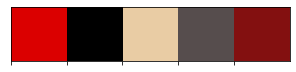

In [40]:
# Set your custom color palette
netflix_colors = ["#db0000", "#000000", "#e9cca4", "#564d4d","#831010"]
sns.set_palette(sns.color_palette(netflix_colors))
sns.palplot(netflix_colors)

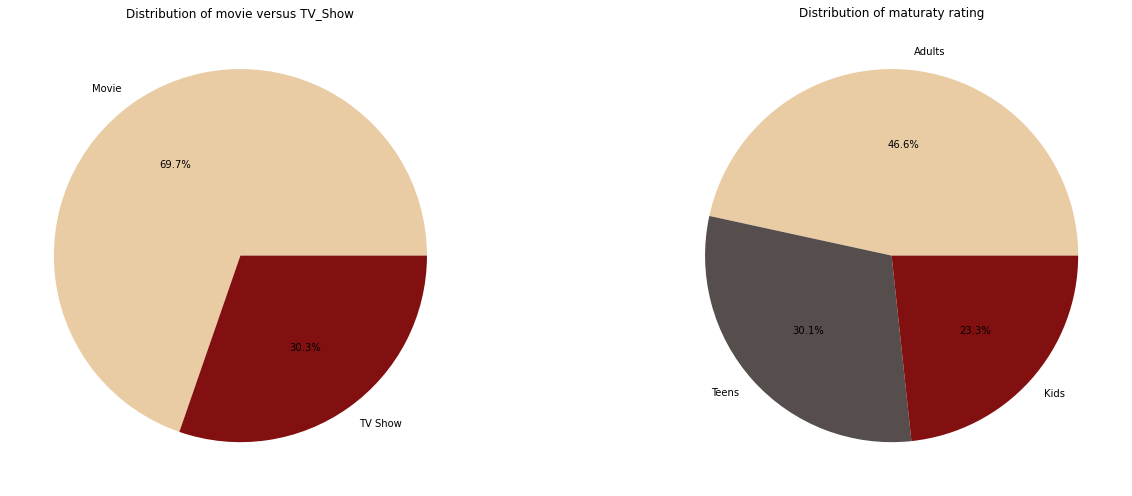

In [45]:
type_df=netflix_df['type'].value_counts()
rating_df=netflix_df['maturity_rating'].value_counts()
fig, axes = plt.subplots(1,2, figsize=(20, 7))
axes[0].pie(type_df,labels=type_df.index,autopct="%1.1f%%",colors=["#e9cca4","#831010"])
axes[1].pie(rating_df,labels=rating_df.index,autopct="%1.1f%%",colors=["#e9cca4","#564d4d","#831010"])
axes[0].title.set_text('Distribution of movie versus TV_Show')
axes[1].title.set_text('Distribution of maturaty rating')
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Top 10 countries ')

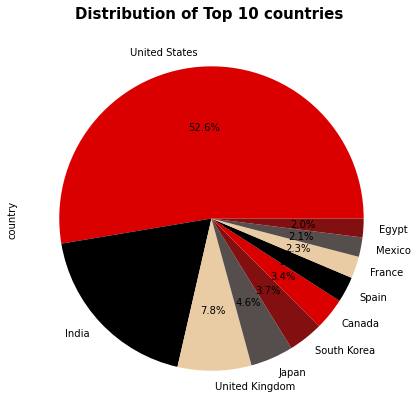

In [47]:
#from movie dataframe
country_ls=[i for i in netflix_df['country'].value_counts().head(11).to_dict()]
country_ls.remove('not_mention')
country_df=pd.concat([netflix_df[netflix_df['country']==i] for i in country_ls])
plt.figure(figsize=(20,7))
country_df['country'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title('Distribution of Top 10 countries ',fontsize= 15,pad=10,fontweight="bold")

Text(0.5, 1.0, 'Distribution of Top 10 countries based on type ')

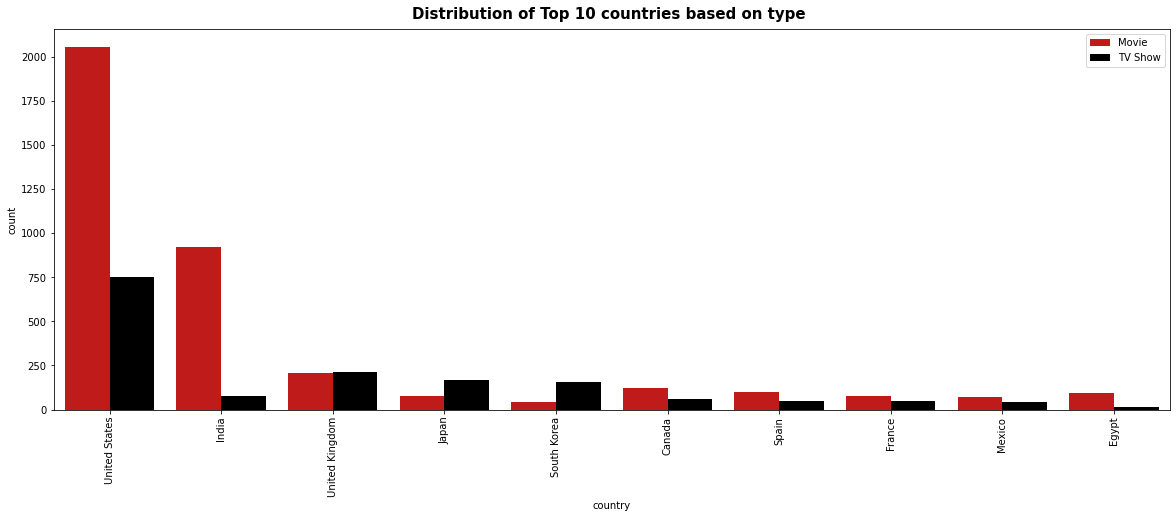

In [48]:
plt.figure(figsize=(20,7))
sns.countplot(x='country',data=country_df,hue='type',palette=netflix_colors)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('Top 10 countries based on type ',fontsize= 15,pad=10,fontweight="bold")


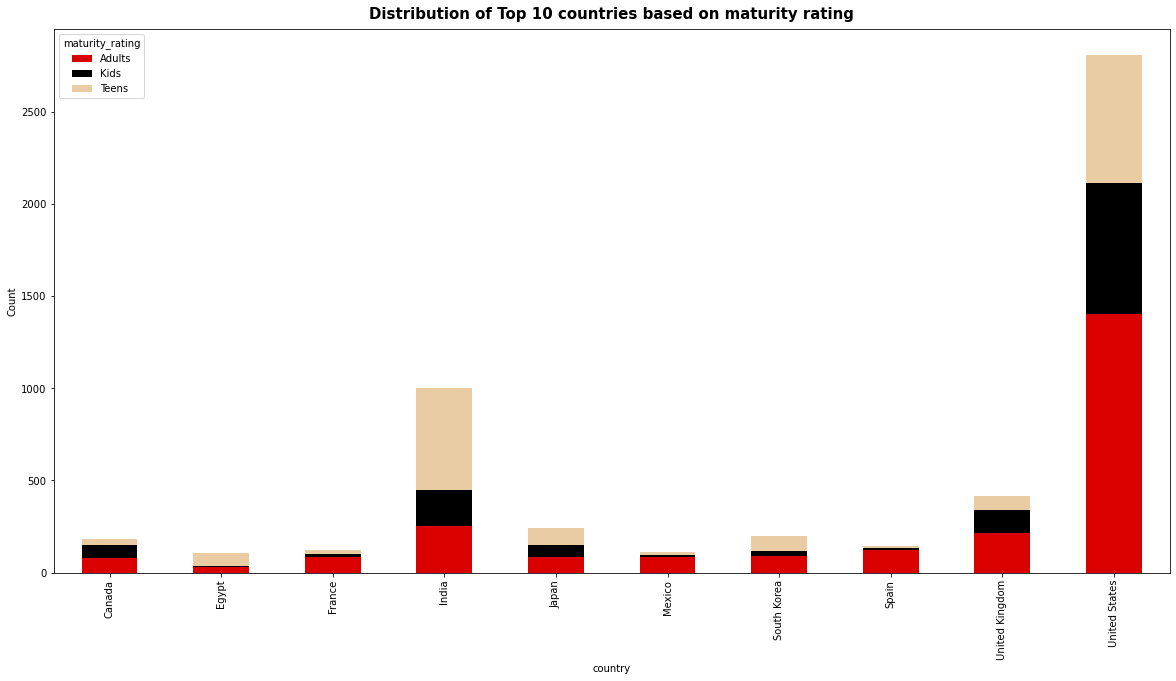

In [49]:

country_df_gr=country_df.groupby(['country','maturity_rating']).count()['type'].unstack()
country_df_gr.plot(kind='bar', stacked=True)
plt.ylabel("Count")
plt.title('Top 10 countries based on maturity rating',fontsize= 15,pad=10,fontweight="bold")
plt.gcf().set_size_inches(20, 10)

maturity_rating,Adults,Kids,Teens,total
year-month_added,,,,
2021-July,111.0,66.0,80.0,257.0
2019-November,115.0,65.0,75.0,255.0
2019-December,81.0,43.0,91.0,215.0
2021-June,108.0,33.0,66.0,207.0
2020-January,100.0,41.0,64.0,205.0
2019-October,89.0,47.0,57.0,193.0
2018-October,70.0,41.0,79.0,190.0
2021-April,85.0,49.0,54.0,188.0
2018-December,103.0,32.0,50.0,185.0


<Figure size 1440x504 with 0 Axes>

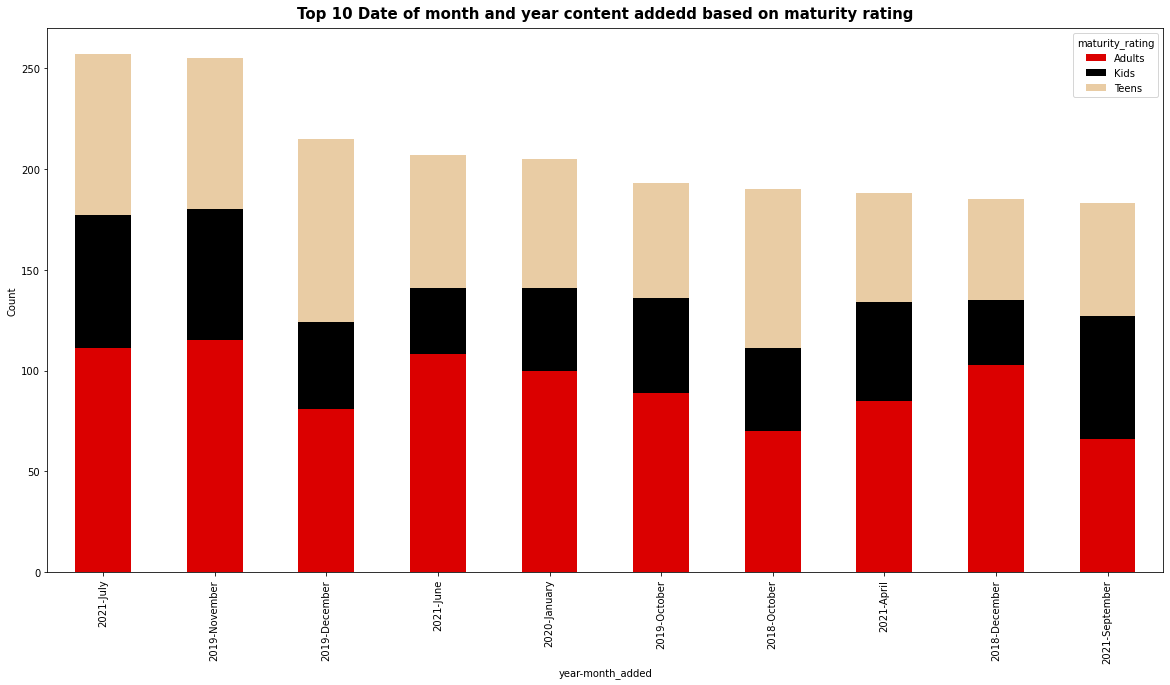

In [51]:
year_month_df=netflix_df.groupby(['year-month_added','maturity_rating']).count()['type'].unstack()
year_month_df.fillna(0,inplace=True)
year_month_df['total']=year_month_df['Adults']+year_month_df['Teens']+year_month_df['Kids']
year_month_df=year_month_df.sort_values(by='total',ascending=False).head(10)
plt.figure(figsize=(20,7))
year_month_df[['Adults','Kids','Teens']].plot(kind='bar',stacked=True)
plt.ylabel("Count")
plt.title('Top 10 Date of month and year content addedd based on maturity rating',fontsize= 15,pad=10,fontweight="bold")
plt.gcf().set_size_inches(20, 10)
year_month_df

type,Movie,TV Show,total
year-month_added,,,
2021-July,169.0,88.0,257.0
2019-November,187.0,68.0,255.0
2019-December,168.0,47.0,215.0
2021-June,124.0,83.0,207.0
2020-January,152.0,53.0,205.0
2019-October,128.0,65.0,193.0
2018-October,145.0,45.0,190.0
2021-April,135.0,53.0,188.0
2018-December,124.0,61.0,185.0


<Figure size 1440x504 with 0 Axes>

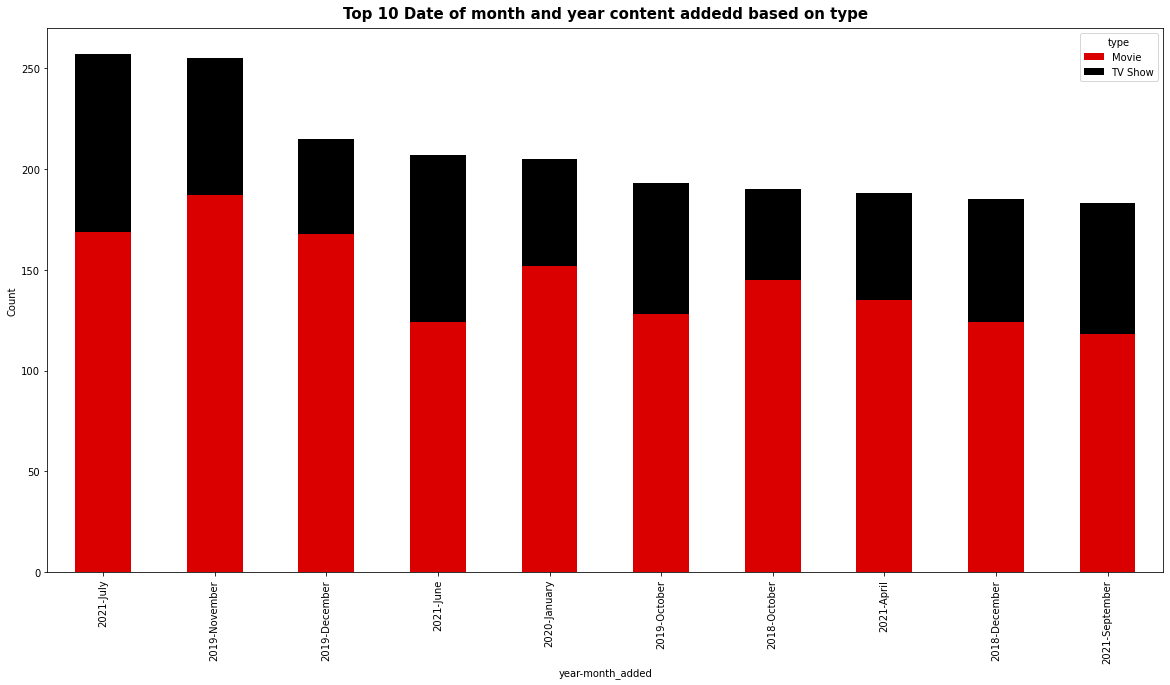

In [52]:
year_month_df=netflix_df.groupby(['year-month_added','type']).count()['maturity_rating'].unstack()
year_month_df.fillna(0,inplace=True)
year_month_df['total']=year_month_df['Movie']+year_month_df['TV Show']
year_month_df=year_month_df.sort_values(by='total',ascending=False).head(10)
plt.figure(figsize=(20,7))
year_month_df[['Movie','TV Show']].plot(kind='bar',stacked=True)
plt.ylabel("Count")
plt.title('Top 10 Date of month and year content addedd based on type',fontsize= 15,pad=10,fontweight="bold")
plt.gcf().set_size_inches(20, 10)
year_month_df

Text(0.5, 1.0, 'Distribution of release_year versus year_added')

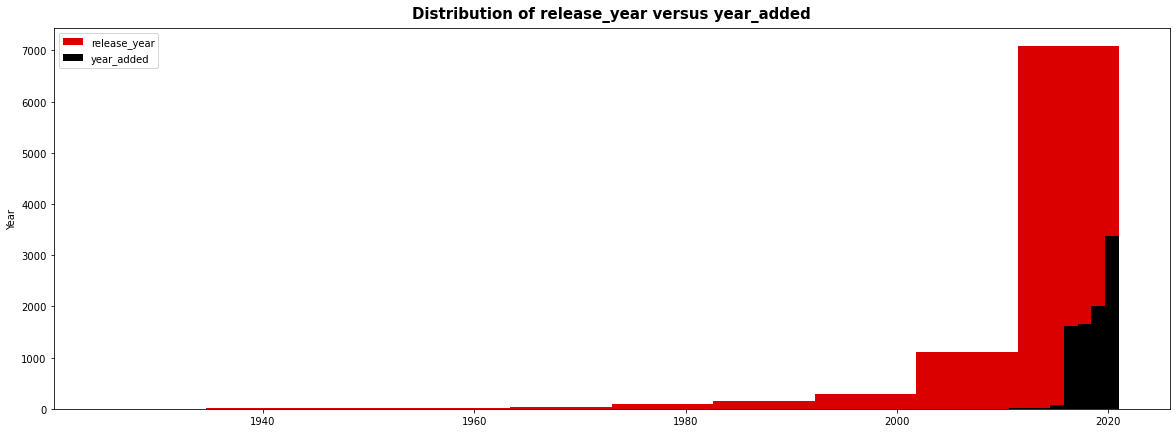

In [53]:
plt.figure(figsize=(20,7))
netflix_df['release_year'].plot(kind='hist',label='release_year')
netflix_df['year_added'].plot(kind='hist',label='year_added')
plt.legend()
plt.ylabel("Year")
plt.title('Distribution of release_year versus year_added',fontsize= 15,pad=10,fontweight="bold")

Text(0, 0.5, 'Year')

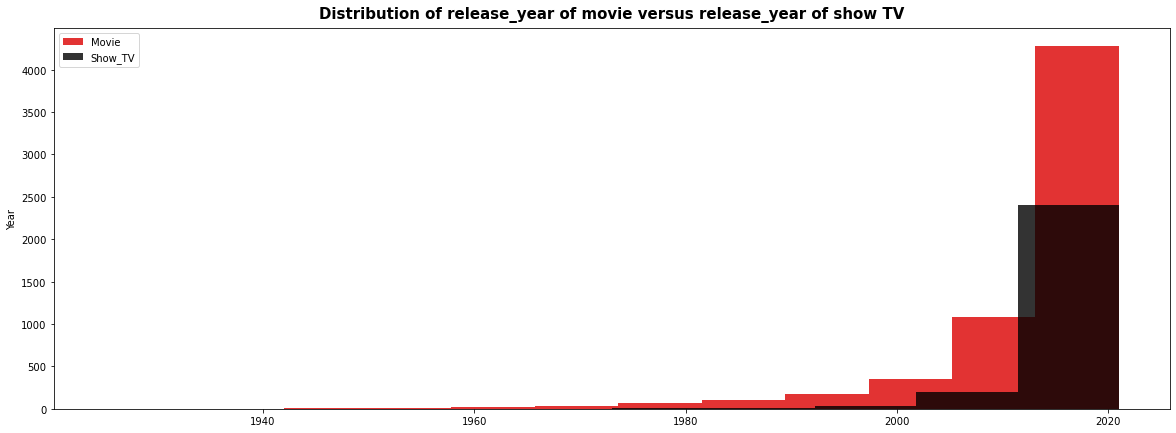

In [54]:
plt.figure(figsize=(20,7))
movie_df['release_year'].plot(kind='hist',label='Movie',alpha=.8)
show_df['release_year'].plot(kind='hist',label='Show_TV',alpha=.8)
plt.legend()
plt.title('Distribution of release_year of movie versus release_year of show TV',fontsize= 15,pad=10,fontweight="bold")
plt.ylabel("Year")

Text(0.5, 1.0, 'Distribution of year_added of movie versus year_added of show TV')

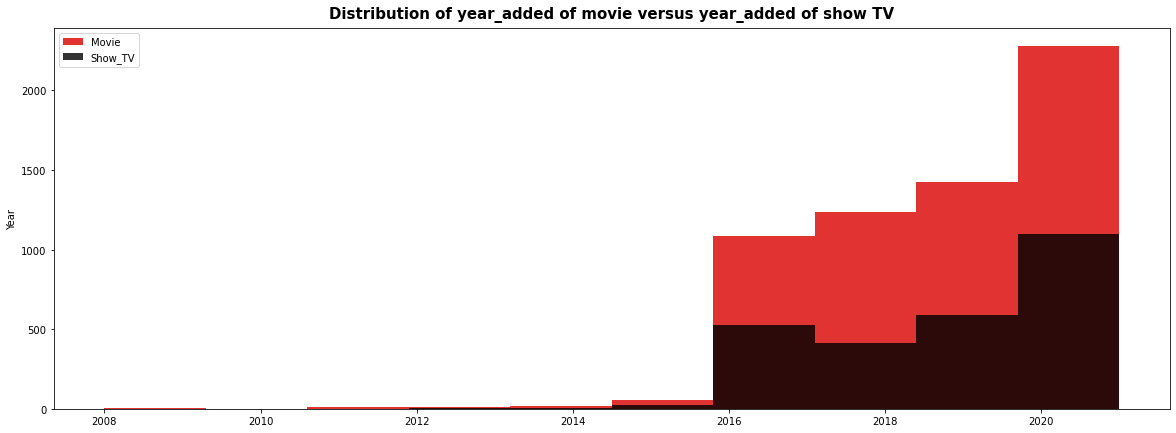

In [55]:
plt.figure(figsize=(20,7))
movie_df['year_added'].plot(kind='hist',label='Movie',alpha=.8)
show_df['year_added'].plot(kind='hist',label='Show_TV',alpha=.8)
plt.legend()
plt.ylabel("Year")
plt.title('Distribution of year_added of movie versus year_added of show TV',fontsize= 15,pad=10,fontweight="bold")

#### Time for looking at the most active movie and show directors 

Text(0.5, 1.0, 'Top 10 Movie Directors')

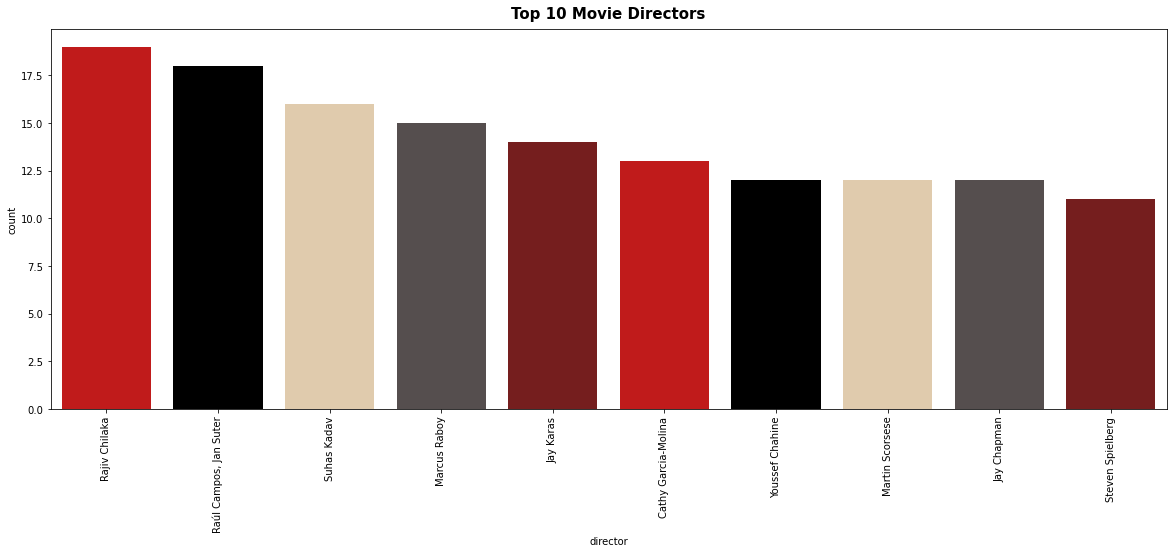

In [60]:
plt.figure(figsize=(20,7))
sns.countplot(x='director',data=movie_dir_df,palette=netflix_colors)
plt.xticks(rotation="vertical")
plt.title('Top 10 Movie Directors',fontsize= 15,pad=10,fontweight="bold")


Text(0.5, 1.0, 'Top 10 Movie Directors based on maturity rate')

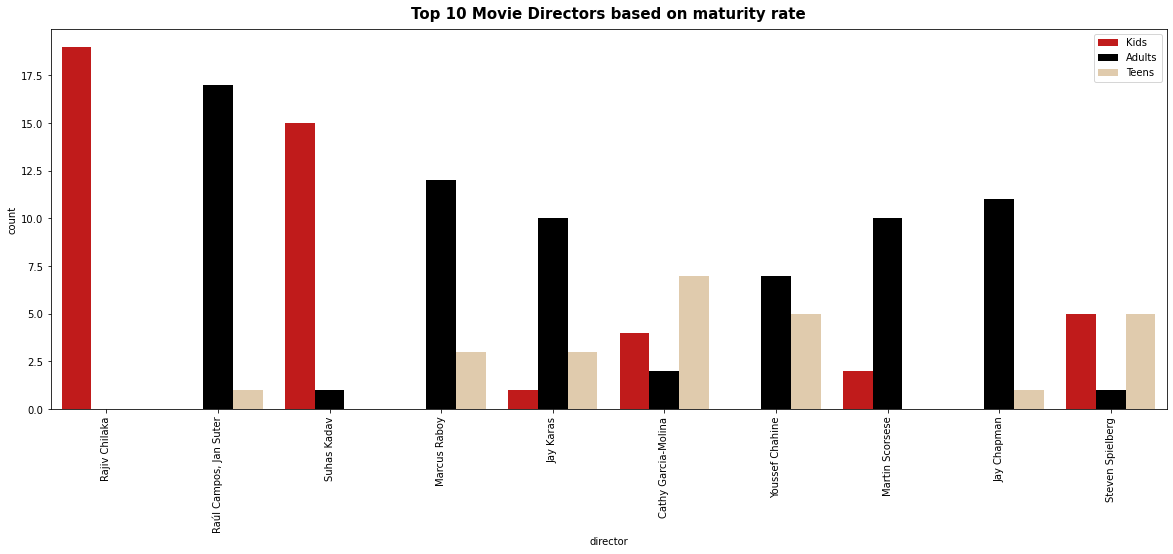

In [61]:

plt.figure(figsize=(20,7))
sns.countplot(x='director',data=movie_dir_df,hue='maturity_rating',palette=netflix_colors)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('Top 10 Movie Directors based on maturity rate',fontsize= 15,pad=10,fontweight="bold")

Text(0.5, 1.0, 'Top 10 Movie Directors based and thier range of movie duration')

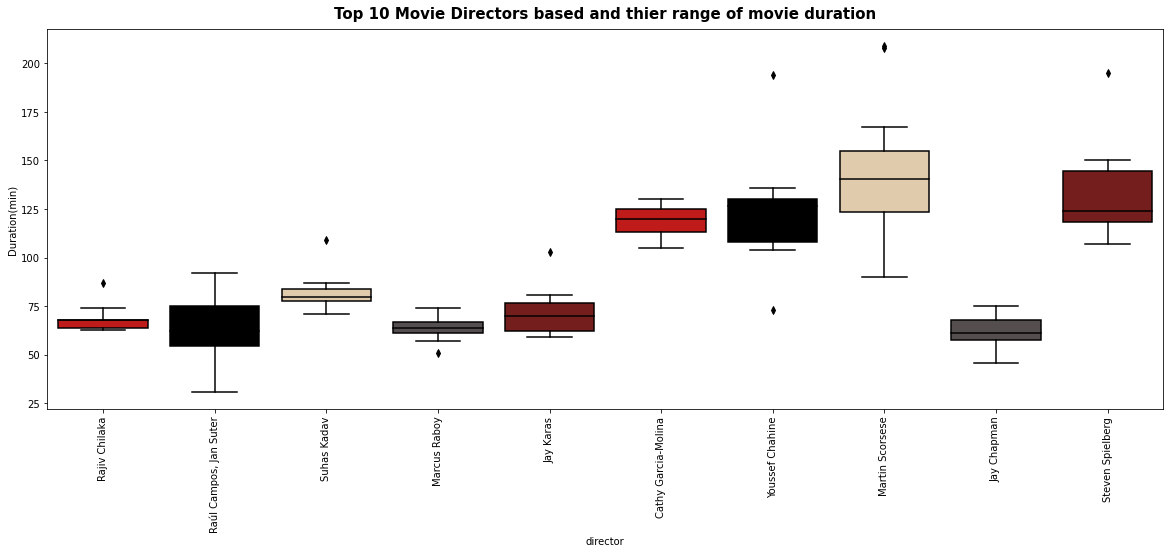

In [62]:

plt.figure(figsize=(20,7))
sns.boxplot(x="director", y="duration", data=movie_dir_df,palette=netflix_colors)
plt.xticks(rotation="vertical")
plt.ylabel("Duration(min)")
plt.title('Top 10 Movie Directors based and thier range of movie duration',fontsize= 15,pad=10,fontweight="bold")


#### Now looking at the most active show directors 

Text(0.5, 1.0, 'Top 10 Show TV Directors')

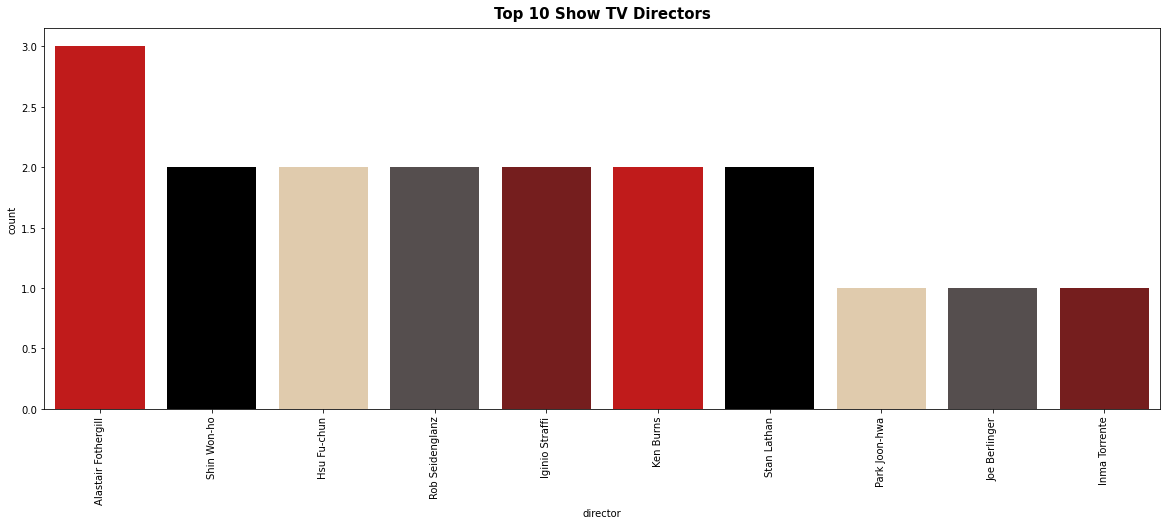

In [63]:
plt.figure(figsize=(20,7))
sns.countplot(x='director',data=show_dir_df,palette=netflix_colors)
plt.xticks(rotation="vertical")
plt.title('Top 10 Show TV Directors',fontsize= 15,pad=10,fontweight="bold")

Text(0.5, 1.0, 'Top 10 Show TV Directors based on maturity rate')

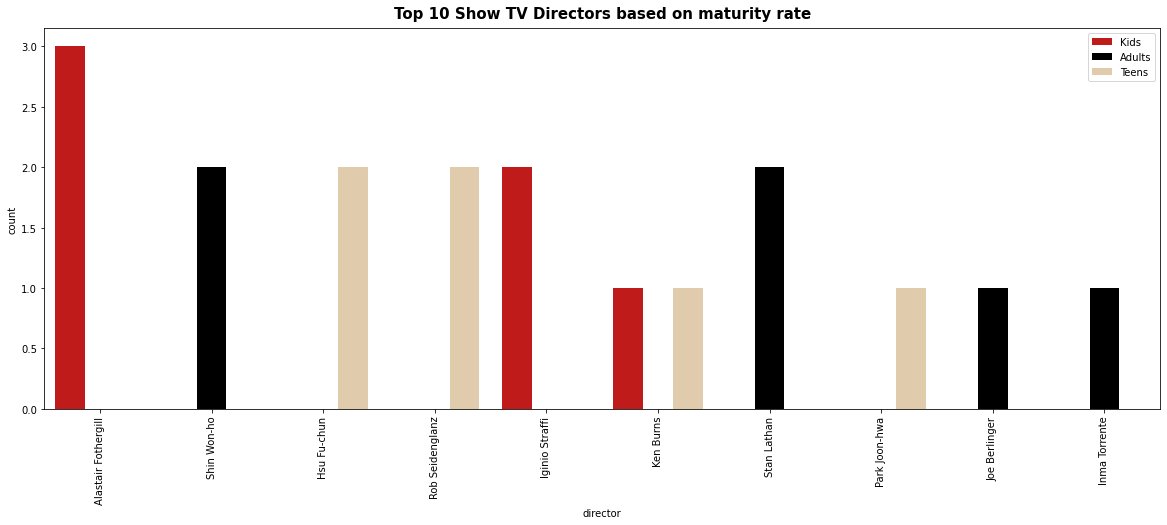

In [64]:
plt.figure(figsize=(20,7))
sns.countplot(x='director',data=show_dir_df,hue='maturity_rating',palette=netflix_colors)
plt.legend(loc='upper right')
plt.xticks(rotation="vertical")
plt.title('Top 10 Show TV Directors based on maturity rate',fontsize= 15,pad=10,fontweight="bold")

Text(0.5, 1.0, 'Top 10 Show TV Directors and the number of seasons based on maturity rate')

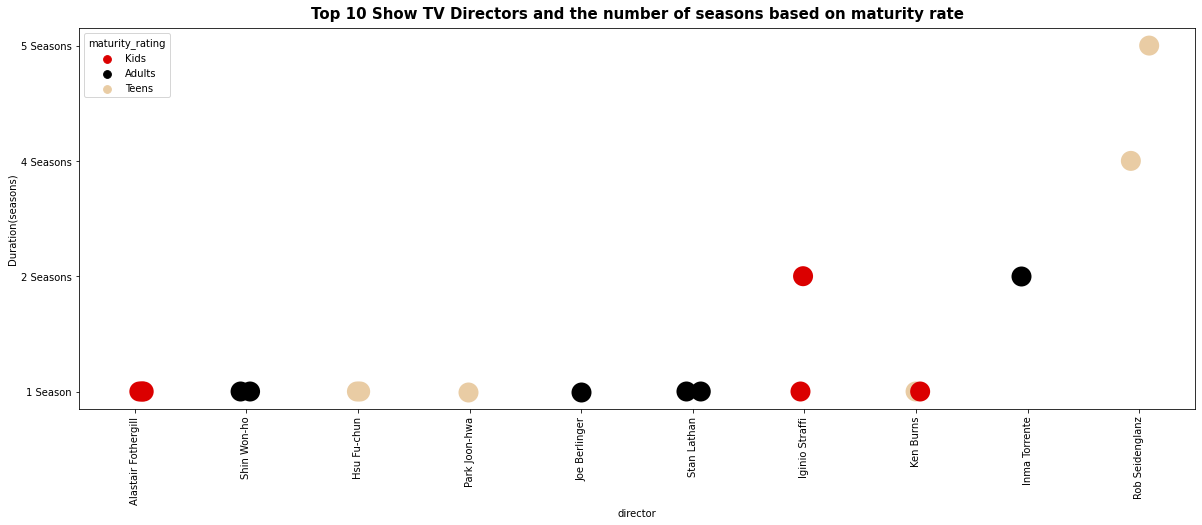

In [65]:
plt.figure(figsize=(20,7))
sns.stripplot(x="director", y="duration", data=show_dir_df.sort_values(by='duration'),palette=netflix_colors,size=20,hue='maturity_rating')
plt.xticks(rotation="vertical")
plt.ylabel("Duration(seasons)")
plt.title('Top 10 Show TV Directors and the number of seasons based on maturity rate',fontsize= 15,pad=10,fontweight="bold")

In [94]:
from sklearn.preprocessing import MultiLabelBinarizer 

In [116]:
show_df['listed_in_'] = show_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
show_keys = set([item for sublist in show_df['listed_in_'] for item in sublist])
print(f"There are {len(show_keys)} types in the Show Tv Netflix Dataset")
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(show_df['listed_in_']), columns=mlb.classes_, index=show_df['listed_in_'].index)
show_list_df=pd.DataFrame([res[i].sum() for i in res.columns], index=res.columns,columns=['count'])
show_list_df.sort_values(by="count",ascending=False,inplace=True)

There are 22 types in the Show Tv Netflix Dataset


<Figure size 1440x504 with 0 Axes>

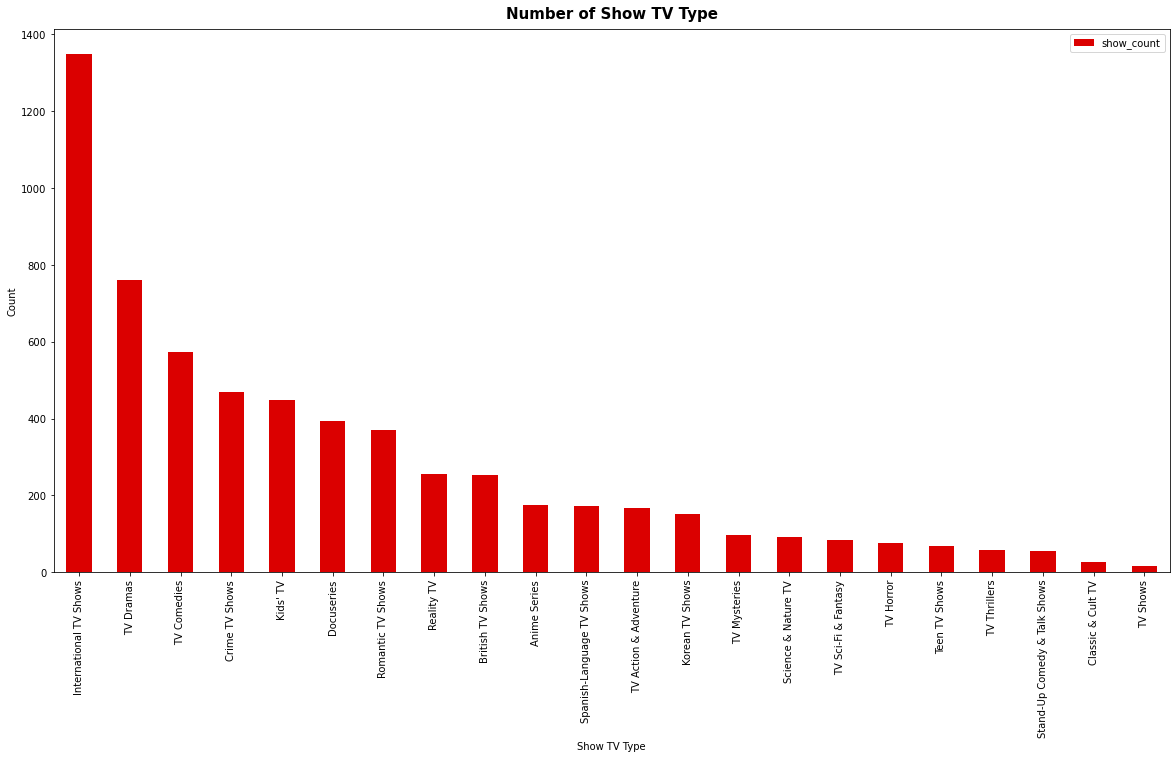

In [130]:
plt.figure(figsize=(20,7))
show_list_df.plot.bar()
plt.xticks(rotation="vertical")
plt.title('Number of Show TV Type',fontsize= 15,pad=10,fontweight="bold")
plt.ylabel("Count")
plt.xlabel("Show TV Type")
plt.gcf().set_size_inches(20, 10)

In [122]:
movie_df['listed_in_'] = movie_df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
movie_keys = set([item for sublist in movie_df['listed_in_'] for item in sublist])
print(f"There are {len(movie_keys)} types in the Movies Netflix Dataset")
mlb = MultiLabelBinarizer()
res_m = pd.DataFrame(mlb.fit_transform(movie_df['listed_in_']), columns=mlb.classes_, index=movie_df['listed_in_'].index)
movie_list_df=pd.DataFrame([res_m[i].sum() for i in res_m.columns], index=res_m.columns,columns=['count'])
movie_list_df.sort_values(by="count",ascending=False,inplace=True)

There are 20 types in the Movies Netflix Dataset


<Figure size 1440x504 with 0 Axes>

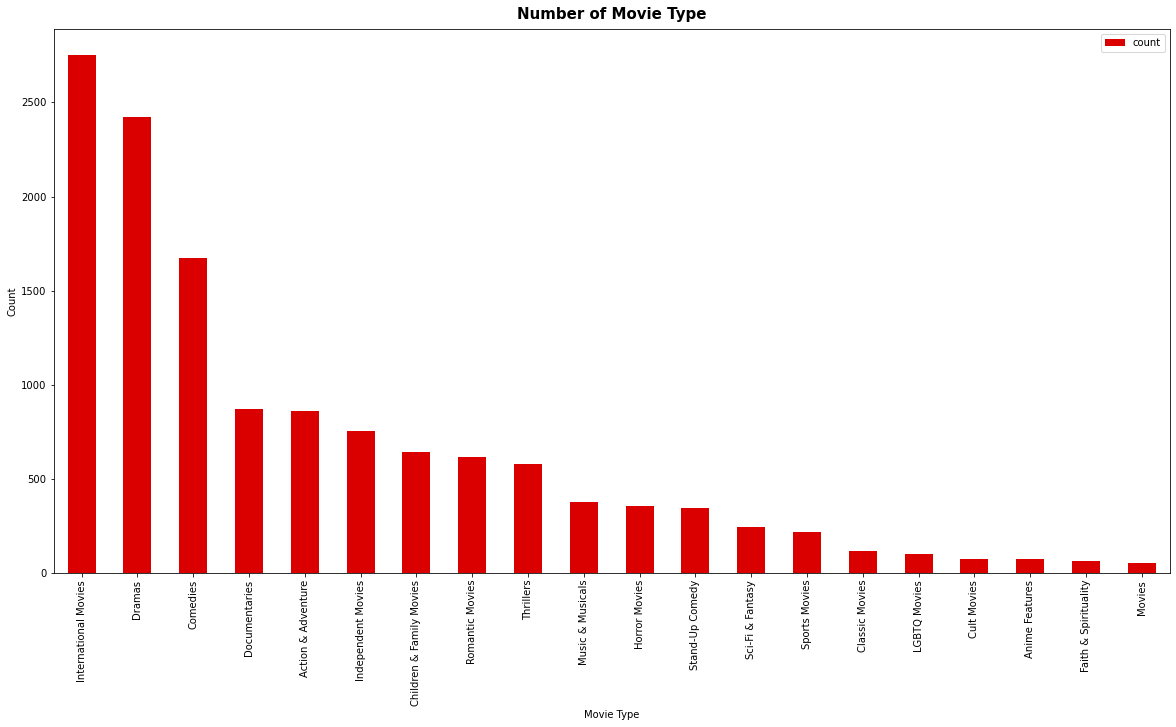

In [129]:
plt.figure(figsize=(20,7))
movie_list_df.plot.bar()
plt.xticks(rotation="vertical")
plt.title('Number of Movie Type',fontsize= 15,pad=10,fontweight="bold")
plt.ylabel("Count")
plt.xlabel("Movie Type")
plt.gcf().set_size_inches(20, 10)